# Lab 00 - Wprowadzenie do AI

Celem tego notebook'a jest przejście przez podstawowe technologie wykorzystywane w uczeniu maszynowym. Wszystko można wykonać u siebie lokalnie instalując biblioteki z pliku `requirements.txt`, natomiast można wszystko również wykonać przy wykorzystaniu Google Colab

[![Otwórz w Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aghbit/BIT-AI-Intro/blob/main/lab_00/main.ipynb)


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from itertools import product
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

Użyjemy tutaj następujących bibliotek:
- **pandas** - do wczytywania i przetwarzania danych
- **scikit learn** - do uczenia maszynowego i pobrania gotowych zbiorów danych
- **matplotlib.pyplot** - do rysowania wykresów

---
## Założenia

Na samym początku, będziemy starali się trzymać dosyć odważnego założenia*. Model to czarna skrzynka, do której możemy wrzucić dane i w jakiś sposób ocenić ich jakość. Jeżeli będziemy mieli więcej czasu, to postaramy się dojść do tego, co się dzieje w środku tej czarnej skrzynki, natomiast to nie jest coś od czego chcemy zacząć.


<small><small><small>*Założenie jest to prawdziwe dla zasadniczo każdego, kto nie pracuje naukowo w tej dziedzinie. Reszta osób przez lata doświadczenia ma jakieś pojęcie jak te rzeczy robić (choć też nie zawsze XD), natomiast zwykle to się sprowadza to wykorzystania optymalizacji hiperparametrów dla standardowych modeli oraz doboru metryki pasującej pod cele firmy ;-;</small></small></small>

---
## Pandas

**Ładowanie zbioru danych**

Na początku potrzebujemy jakiegoś zbioru danych. W tym celu wykorzystamy bibliotekę `pandas`, która oferuje bardzo dużo możliwości manipulowania danymi przedstawionych jako tabele. Na rozgrzewkę zaczniemy zabawę z danymi z katastrofy Titanica. Pierwsze co zrobimy, to załadujemy zbiór danych i sprawdzimy 10 pierwszych wierszy.

In [9]:
orig_titanic = pd.read_csv('data/titanic.csv')
orig_titanic.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**Informacje o zbiorze danych**

Pandas udostępnia nam również metodę `info()`, która wyświetli nam informacje o zbiorze danych

In [10]:
orig_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Więcej informacji**

Jeżeli chcemy uzyskać więcej informacji o zbiorze danych, możemy użyć metody `describe()`, która wyświetli nam statystyki dla każdej kolumny. **Zapamiętaj jaka jest średnia wartość w kolumnie `Survived`!**

In [11]:
orig_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Obserwacje**
Możemy zauważyć, że mamy do czynienia z 11 kolumnami. Zanim zaczniemy cokolwiek robić, warto sprawdzić co one oznaczają. Zwykle takie informacje można znaleźć w jakimś opisie zbioru danych. W naszym przypadku mamy:
- `PassengerId` - Unikalny identyfikator pasażera. Nie jest to informacja istotna.
- `Survived` - Czy pasażer przeżył (1) czy zginął (0). Postaramy się później przewidywać tę wartość.
- `Pclass` - Klasa pasażera (1, 2, 3). Intuicyjnie możemy się domyślić, że w którejś klasie byli pasażerowie bogatsi, a w którejś biedniejsi. Co więcej, jeżeli zastanowimy się nad tym, to ci biedniejsi mieli pokoje na niższych pokładach, a że grawitacja jest faktem, to woda mogła się tam dostac szybciej.
- `Name` - Imię i nazwisko pasażera. Czy to jest rzeczywiście wartościowe?
- `Sex` - Płeć pasażera. Patrząc, że istnieje pewna stara zasada (`Najpierw kobiety i dzieci`), to wydaje się być to wartościową informacją.
- `Age` - Wiek pasażera. Podobnie jak w przypadku płci, może być to wartościowa informacja.
- `SibSp` - Liczba rodzeństwa/małżonków pasażera na pokładzie. Ciężko powiedzieć coś na ten temat, bez analizowania danych.
- `Parch` - Liczba rodziców/dzieci pasażera na pokładzie. Podobnie jak w przypadku `SibSp`, ciężko powiedzieć coś na ten temat, bez analizowania danych.
- `Ticket` - Numer biletu pasażera. Może być ciężko coś z tego wyciągnąć.
- `Fare` - Cena biletu pasażera. Prawdopodobnie im droższy bilet, tym lepsza klasa, a co za tym idzie, większe prawdopodobieństwo przeżycia.
- `Cabin` - Numer kabiny pasażera. Może być ciężko coś z tego wyciągnąć.
- `Embarked` - Port, z którego pasażer wyruszył. Tutaj również ciężko powiedzieć coś na ten temat bez analizy danych.

### Zadanie 1

Mamy do czynienia z kilkoma kolumnami, które nie są liczbami. Modele zasadniczo nie potrafią pracować z tekstem, więc musimy coś z tym zrobić. Na samym początku po prostu pozbędziemy się tych kolumn. W naszym przypadku będą to kolumny `Name`, `Sex`, `Ticket`, `Cabin` oraz `Embarked`. Dodatkowo wiemy, że kolumna `PassengerId` również nie jest istotna, więc również się jej pozbędziemy. W tym celu możemy użyć metody `drop()`, której dokumentację znajdziecie tutaj: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

**Ważne jest, żeby nie modyfikować oryginalnego zbioru danych!**

In [14]:
### ### ### ### ### Twój kod ### ### ### ### ###
dropped_titanic = orig_titanic.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
### ### ### ### ### ### ### ### ### ### ### ###

LHS = set(dropped_titanic.columns.tolist())
RHS = set(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
assert LHS == RHS, f"Expected {RHS}, but got {LHS}"
print("OK!")

OK!


**Ponownie sprawdzamy zbiór danych**

In [15]:
dropped_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


### Zadanie 2
Teraz możemy zauważyć, że mamy kolumny `Age` oraz `Fare`, które mają wartości `NaN`. Z zasady staramy się unikać takich wartości, więc musimy coś z tym zrobić. Tym razem nie będziemy się ich pozbywać, zastąpimy je średnią wartością w danej kolumnie ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)). Możemy to zrobić, dzięki temu, że mamy same liczby. W tym celu możemy użyć metody `fillna()`, której dokumentację znajdziecie tutaj: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

In [18]:
### ### ### ### ### Twój kod ### ### ### ### ###
means = dropped_titanic.mean()
### ### ### ### ### ### ### ### ### ### ### ###

assert np.abs(means['Survived'] - 0.3636) < 1e-3, f"Survived: {means['Survived']}, expected ~0.3636"
assert np.abs(means['Pclass'] - 2.2655) < 1e-3, f"Pclass: {means['Pclass']}, expected ~2.2655"
assert np.abs(means['Age'] - 30.2726) < 1e-3, f"Age: {means['Age']}, expected ~30.2726"
assert np.abs(means['SibSp'] - 0.4473) < 1e-3, f"SibSp: {means['SibSp']}, expected ~0.4473"
assert np.abs(means['Parch'] - 0.3923) < 1e-3, f"Parch: {means['Parch']}, expected ~0.3923"
assert np.abs(means['Fare'] - 35.6271) < 1e-3, f"Fare: {means['Fare']}, expected ~35.6271"
print("Means OK!")

### ### ### ### ### Twój kod ### ### ### ### ###
clean_titanic = dropped_titanic.fillna(means)
### ### ### ### ### ### ### ### ### ### ### ###

assert np.abs(clean_titanic.isnull().sum().sum()) < 1e-6, "NaN values still exist"
print("Cleaned OK!")

Means OK!
Cleaned OK!


### Zadanie 3

Mamy teraz pełny zbiór danych, który możemy wykorzystać do trenowania modelu. Więc zasadniczo to teraz zrobimy. Natomiast testowanie modelu na którym go trenowaliśmy brzmi jak łatwe zadanie. Dlatego też lepszym podejściem jest podzielenie zbioru danych na dwie części. Jedną część wykorzystamy do trenowania modelu, a drugą do testowania. W tym celu możemy użyć metody `train_test_split()`, której dokumentację znajdziecie tutaj: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Podzielimy zbiór danych w proporcji `train=60; test=40`. Ustawmy również `random_state=70`, żeby mieć pewność, że podział będzie zawsze taki sam.

In [22]:
### ### ### ### ### Twój kod ### ### ### ### ###
train, test = train_test_split(clean_titanic, train_size=0.6, test_size=0.4, random_state=70)
### ### ### ### ### ### ### ### ### ### ### ###

assert train.shape[0] == 250, f"Train shape should be 250, but got {train.shape[0]}"
assert test.shape[0] == 168, f"Test shape should be 168, but got {test.shape[0]}"
print("OK!")

OK!


### Zadanie 4

Zanim przjedziemy do trenowania modelu, musimy jeszcze wiedzieć co model ma przewidywać. Nie ma sensu, żeby uczyć model na danych, w który jest wprost podany wynik. Dlatego też musimy oddzielić kolumnę `Survived` od reszty zbioru danych. Tutaj znowu chcemy się posłużyć metodą `drop()`.

Przyjęło się, że wartości które przewidujemy są w zmiennej `y`, a reszta zbioru danych jest w zmiennej `X`.

In [26]:
### ### ### ### ### Twój kod ### ### ### ### ###
train_X = train.drop(columns=['Survived'])
train_y = train['Survived']

test_X = test.drop(columns=['Survived'])
test_y = test['Survived']
### ### ### ### ### ### ### ### ### ### ### ###

assert train_X.shape[0] == 250, f"Train_X shape should be 250, but got {train_X.shape[0]}"
assert train_X.shape[1] == 5, f"Train_X shape should be 5, but got {train_X.shape[1]}"
assert train_y.shape[0] == 250, f"Train_y shape should be 250, but got {train_y.shape[0]}"
assert len(train_y.shape) == 1, f"Train_y shape should be 1D, but got {train_y.shape}"

assert test_X.shape[0] == 168, f"Test_X shape should be 168, but got {test_X.shape[0]}"
assert test_X.shape[1] == 5, f"Test_X shape should be 5, but got {test_X.shape[1]}"
assert test_y.shape[0] == 168, f"Test_y shape should be 168, but got {test_y.shape[0]}"
assert len(test_y.shape) == 1, f"Test_y shape should be 1D, but got {test_y.shape}"

---
## Sklearn

**Prosty model**

Potrzebujemy jakiegoś sposobu, na stworzenie jakiegoś modelu. W tym celu wykorzystamy bibliotekę `sklearn`, która głównie oferuje nam gotowe modele oraz metody do ich trenowania.

### Zadanie 5

Teraz przejdziemy do trenowania modelu. W tym celu wykorzystamy model `RandomForestClassifier`, którego dokumentację znajdziecie tutaj: [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Aktualnie interesują nas 3 etapy, które będziemy musieli wykonać:
- Utworzenie modelu
- Trenowanie modelu
- Zwracanie predykcji

In [28]:
### ### ### ### ### Twój kod ### ### ### ### ###
### Tworzymy model ###
model = RandomForestClassifier()

### Trenujemy model ###
model.fit(train_X, train_y)

### Predykcja na zbiorze testowym ###
pred = model.predict(test_X)
#raise NotImplementedError("You need to implement the prediction step")
### ### ### ### ### ### ### ### ### ### ### ###

assert type(model) == RandomForestClassifier, f"Model should be RandomForestClassifier, but got {type(model)}"
assert len(pred) == 168, f"Pred shape should be 84, but got {len(pred)}"

### Zadanie 6

I dochodzimy do ostatniego etapu, czyli oceny modelu. W tym celu wykorzystamy metrykę `accuracy_score`, której dokumentację znajdziecie tutaj: [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). Metryka ta zwraca nam wartość od 0 do 1, gdzie 1 oznacza, że model przewidział wszystko dobrze, a 0, że przewidział wszystko źle.

In [30]:
### ### ### ### ### Twój kod ### ### ### ### ###
acc = accuracy_score(test_y, pred)
#raise NotImplementedError("Calculate accuracy using accuracy_score")
### ### ### ### ### ### ### ### ### ### ### ###

print(f"Accuracy: {100 * acc:.2f}%")

Accuracy: 60.71%


**Czy to dobry wynik?**

To zależy. Na potrzeby tego ćwiczenia, zrobimy dwa nowe modele, które będą przewidywały, że wszyscy przeżyli oraz że wszyscy zginęli. Jeżeli nasz model będzie lepszy od tych dwóch, to znaczy, że nie jest źle.

In [31]:
def all_ok(test_input: pd.DataFrame):
    return np.ones(test_input.shape[0], dtype=bool)

def all_not_ok(test_input: pd.DataFrame):
    return np.zeros(test_input.shape[0], dtype=bool)

pred_ok = all_ok(test_X)
pred_not_ok = all_not_ok(test_X)

acc_ok = accuracy_score(test_y, pred_ok)
acc_not_ok = accuracy_score(test_y, pred_not_ok)

print(f"Accuracy (all OK): {100 * acc_ok:.2f}%")
print(f"Accuracy (all NOT OK): {100 * acc_not_ok:.2f}%")

Accuracy (all OK): 39.88%
Accuracy (all NOT OK): 60.12%


**Porażka (?)**

Dobrze nie jest. Model który za każdym razem zwraca informację, że ktoś umarł ma podobny wynik do tego mądergo modelu, nad którym tyle pracowaliśmy. Natomiast to również zależy od tego, w jaki sposób podzieliliśmy zbiór danych. Zauważmy, że w oryginalnym zbiorze mamy ok. 36% osób, które przeżyły. Model który zwraca za każdym razem że osoba przeżyła, ma wynik prawie 40%.

### Zadanie 7

Zrobimy funkcję, która wykona cały proces z zadań od 3 do 6 włącznie. Funkcja powinna za argument przyjmować zbiór danych oraz `random_state`. Funkcja powinna zwracać dokładność modelu. Reszty parametrów nie zmieniamy.

In [36]:
### ### ### ### ### Twój kod ### ### ### ### ###
def run_pipeline(dataframe: pd.DataFrame, random_state: int = 0, test_size=0.4) -> float:
    train, test = train_test_split(dataframe, train_size=0.6, test_size=0.4, random_state=random_state)
    train_X = train.drop(columns=['Survived'])
    train_y = train['Survived']

    test_X = test.drop(columns=['Survived'])
    test_y = test['Survived']

    model = RandomForestClassifier()
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    acc = accuracy_score(test_y, pred)

    return acc
    #raise NotImplementedError("You need to implement this function")
### ### ### ### ### ### ### ### ### ### ### ###

**I czas sprawdzić, czy rzeczywiście nasz model jest gorszy od modelu, który przewiduje, że wszyscy przeżyli oraz że wszyscy zginęli!**

In [37]:
results = [run_pipeline(clean_titanic, random_state=i) for i in tqdm(range(200))]
avg_acc = np.mean(results)
std_acc = np.std(results)
print(f"Min accuracy: {100 * np.min(results):.2f}%")
print(f"Avg accuracy: {100 * avg_acc:.2f}%")
print(f"Max accuracy: {100 * np.max(results):.2f}%\n")
print(f"25th percentile accuracy: {100 * np.percentile(results, 25):.2f}%")
print(f"Median accuracy: {100 * np.median(results):.2f}%")
print(f"75th percentile accuracy: {100 * np.percentile(results, 75):.2f}%")

100%|██████████| 200/200 [00:38<00:00,  5.14it/s]

Min accuracy: 54.76%
Avg accuracy: 62.38%
Max accuracy: 72.62%

25th percentile accuracy: 60.12%
Median accuracy: 62.50%
75th percentile accuracy: 64.29%


**Wnioski**

Wcale dużo gorzej nie jest, jak to się wydawało na pierwszy rzut oka. Zarówno mediana jak i średnia są w okolicach 63%, czyli mniej więcej tyle ile można by się spodziewać patrząc na model zwracający za każdym razem, że ktoś umarł (co zdarzało się częściej).

### Zadanie 8

Wróćmy na sam początek, kiedy dokonaliśmy obserwacji, że kolumna `Sex` może być wartościowa, ale pozbyliśmy się jej. Kiedy przyjrzymy się naszym danym bardziej, to zobaczymy, że kolumna `Sex` ma wartości `female` oraz `male`. Skoro komputer nie potrafi pracować z tekstem, to możemy przypisać tym wartością liczby. W tym przypadku możemy przypisać `female` do 1, a `male` do 0. Możemy to zrobić przy pomocy metody `replace()`, której dokumentację znajdziecie tutaj: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). Możemy również użyć metody `get_dummies()`, która zamieni nam kolumnę na dwie kolumny, które będą miały wartości 0 lub 1. Dokumentacja: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [46]:
dropped_titanic = orig_titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
### ### ### ### ### Twój kod ### ### ### ### ###
titanic_replace = dropped_titanic.copy().replace({'female': 1, 'male': 0})
#raise NotImplementedError("Replace not implemented")
### ### ### ### ### ### ### ### ### ### ### ###

### ### ### ### ### Twój kod ### ### ### ### ###
titanic_dummies = pd.get_dummies(dropped_titanic, columns=['Sex'])
#raise NotImplementedError("Dummies not implemented")
### ### ### ### ### ### ### ### ### ### ### ###

/tmp/ipython-input-3493061837.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_replace = dropped_titanic.copy().replace({'female': 1, 'male': 0})


In [47]:
titanic_replace.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,34.5,0,0,7.8292
1,1,3,1,47.0,1,0,7.0000
2,0,2,0,62.0,0,0,9.6875
3,0,3,0,27.0,0,0,8.6625
4,1,3,1,22.0,1,1,12.2875
5,0,3,0,14.0,0,0,9.2250
6,1,3,1,30.0,0,0,7.6292
7,0,2,0,26.0,1,1,29.0000
8,1,3,1,18.0,0,0,7.2292
9,0,3,0,21.0,2,0,24.1500


In [48]:
titanic_dummies.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,34.5,0,0,7.8292,False,True
1,1,3,47.0,1,0,7.0000,True,False
2,0,2,62.0,0,0,9.6875,False,True
3,0,3,27.0,0,0,8.6625,False,True
4,1,3,22.0,1,1,12.2875,True,False
5,0,3,14.0,0,0,9.2250,False,True
6,1,3,30.0,0,0,7.6292,True,False
7,0,2,26.0,1,1,29.0000,False,True
8,1,3,18.0,0,0,7.2292,True,False
9,0,3,21.0,2,0,24.1500,False,True


Zasadniczo bardziej uzasadnione jest stosowanie `get_dummies`, więc skupimy się na tym zbiorze.

### Zadanie 9

Ponownie wytrenujemy model, tym razem na danych zawierających informację o płci.

In [50]:
### ### ### ### ### Twój kod ### ### ### ### ###
train, test = train_test_split(titanic_dummies, train_size=0.6, random_state=42)

train_X = train.drop(columns=['Survived'])
train_y = train['Survived']

test_X = test.drop(columns=['Survived'])
test_y = test['Survived']

model = RandomForestClassifier()
model.fit(train_X, train_y)

pred = model.predict(test_X)
acc = accuracy_score(test_y, pred)

### ### ### ### ### ### ### ### ### ### ### ###

---
## Dyskusja
---

**Ćwiczenia związane z biblioteką `pandas`**
- [Kaggle](https://www.kaggle.com/learn/pandas)

---
## Tworzenie wykresów

Często chcielibyśmy popatrzeć na nasze dane, ponieważ to może nam pomóc w ich zrozumieniu. W tym celu wykorzystamy bibliotekę `matplotlib` oraz `seaborn`, które służą do tworzenia wykresów.

### Przykład
Wrócimy do naszego oryginalnego zbioru danych, żeby zobaczyć jak wygląda rozkład wieku pasażerów. W tym celu wykorzystamy wykres `histogram`, który pokazuje nam rozkład wartości w danej kolumnie. Dokumentacja: [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

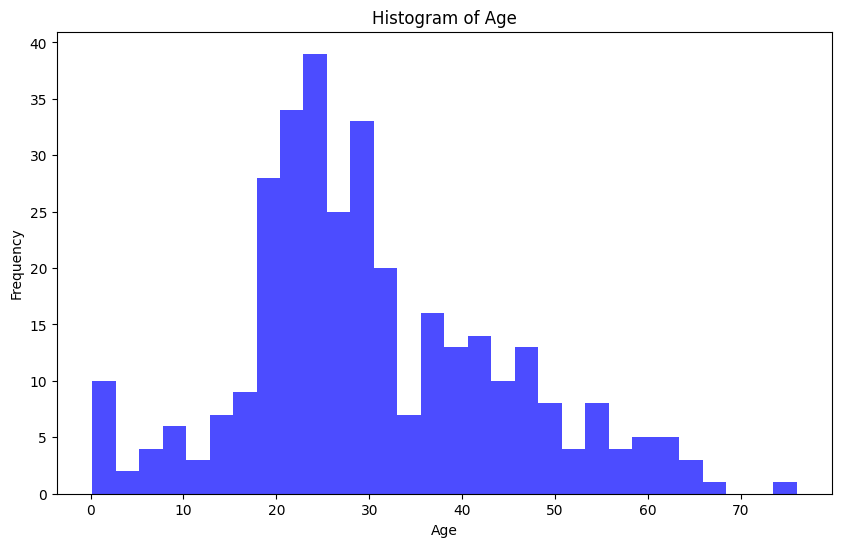

In [51]:
x = orig_titanic['Age'].dropna()

# Inicjalizujemy wykres
plt.figure(figsize=(10, 6))

# Tworzymy histogram, ustawiając liczbę kubełków na 30, kolor na niebieski i przezroczystość na 0.7
plt.hist(x, bins=30, color='blue', alpha=0.7)

# Ustawiamy tytuł wykresu
plt.title('Histogram of Age')

# Ustawiamy etykiety osi
plt.xlabel('Age')
plt.ylabel('Frequency')

# Wyświetlamy wykres
plt.show()

**Komentarz**

Zdecydowanie nie jest to najładniejszy wykres, natomiast zdecydowanie mówi nam dużo o rozkładzie wieku pasażerów. Warto zauważyć, że mamy sporo osób, które mają od 20 do 35 lat.

### Zadanie 10
Istnieje takie coś, jak mapa termiczna (heatmap). Idea za tym jest taka, że jeżeli mamy pewne dwie kolumny, to możemy zobaczyć jak bardzo są one podobne do siebie. W tym celu wykorzystamy wykres `heatmap`. Dokumentacja: [link](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

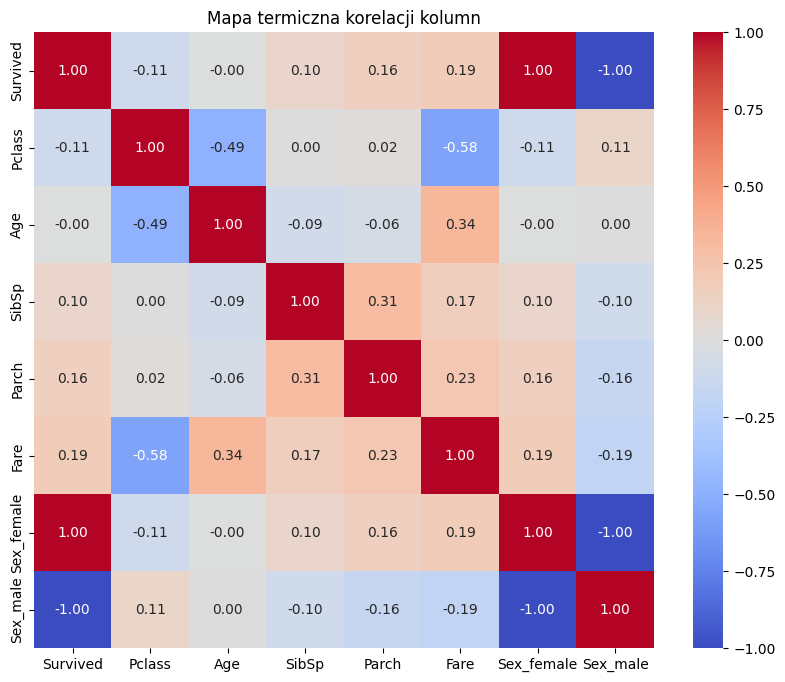

In [55]:
### ### ### ### ### Twój kod ### ### ### ### ###
corr_matrix = titanic_dummies.corr()  # macierz korelacji

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("mapa termiczna korelacji kolumn")
plt.show()
### ### ### ### ### ### ### ### ### ### ### ###

---
## Dyskusja
---

### Zadanie 11

Załadujmy teraz zbiór danych `titanic_2.csv` i zobaczmy jak sprawuje się nasz model z wykorzystaniem dummies.

In [77]:
### ### ### ### ### Twój kod ### ### ### ### ###
orig_titanic2 = pd.read_csv('data/titanic_2.csv')
#orig_titanic.head(n=10)
dropped_titanic2 = orig_titanic2.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
titanic_replace2 = dropped_titanic2.copy().replace({'female': 1, 'male': 0})
means = titanic_replace2.mean()
clean_titanic2 = titanic_replace2.fillna(means)

train, test = train_test_split(clean_titanic2, train_size=0.6, random_state=70)

train_X = train.drop(columns=['Survived'])
train_y = train['Survived']

test_X = test.drop(columns=['Survived'])
test_y = test['Survived']

model = RandomForestClassifier()
model.fit(train_X, train_y)

pred = model.predict(test_X)
acc = accuracy_score(test_y, pred)
print(f"accuracy: {acc*100:.2f}%")
### ### ### ### ### ### ### ### ### ### ### ###

accuracy: 80.11%


/tmp/ipython-input-2127354210.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_replace2 = dropped_titanic2.copy().replace({'female': 1, 'male': 0})


---
Ćwiczenia związane z biblioteką `matplotlib` oraz `seaborn`
- [Kaggle](https://www.kaggle.com/learn/data-visualization)
---

## Zadanie domowe
Na platformie **Kaggle** jest aktywny konkurs, który jest bardzo podobny do zadania, które wykonaliśmy wcześniej. Celem jest przewidzenie czy pasażer został ewakuowany ze statku kosmicznego Titanic; [link](https://www.kaggle.com/competitions/spaceship-titanic).

Z ważniejszych kwestii, które mogą nie być oczywiste na pierwszy rzut oka, to mamy 3 pliki:
- `train.csv` - zbiór danych, który powinien nam posłużyć do trenowania modelu
- `test.csv` - zbiór danych, który powinien nam posłużyć do testowania modelu
- `sample_submission.csv` - przykładowy plik, który powinien być zwrócony na koniec. Wartości w tym pliku są przykładowe i nie mają nic wspólnego z rzeczywistością.

Bardzo ważne jest to, żeby zostawić kolumnę `PassengerId`, ponieważ to jest identyfikator pasażera, który powinien być w pliku zwróconym na koniec. Natomiast kolumna `Transported` powinna być naszą przewidywaną wartością.

Plik, który należy wysłać na koniec, to plik `submission.csv`. Plik można zapisać przy pomocy metody `to_csv()`, której dokumentację znajdziecie tutaj: [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

Wszystko co zrobiliśmy do tej pory powinno być wystarczające, żeby stworzyć model, który będzie przewidywał, czy pasażer został ewakuowany. Czy będzie on dobry? Pewnie nie. Ale nie może być za prosto.